<a href="https://colab.research.google.com/github/sherjahong1r/my-data-sayns-lessons/blob/main/10_11_12_Taqsimot_Distribution%2C_KDE%2C_CDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taqsimot. Distribution**

In [32]:
import pandas as pd
import numpy as np

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Darsimiz uchun Mercedes-Benz firmasi avtomobillari narxini jamlagan jadvalni yuklab olamiz.

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/merc.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [35]:
df.shape

(13119, 9)

In [36]:
df=df[df.year>=2010]             # 2010-yildan keyin chiqqan mashinlarni saqlab qoldik
df=df[df.transmission!='Other']  # transmission ustunidan Other degan qatorlarni tashlab yubordik
df=df[df.fuelType!='Other']      # fuelType ustunidan Other degan qatorlarni tashlab yubordik
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2


In [37]:
df.shape
# Asl df 13119 qator edi ayrimlarini tashlab yuborilgandan so'ng 12990 ta qator qoldi

(12990, 9)

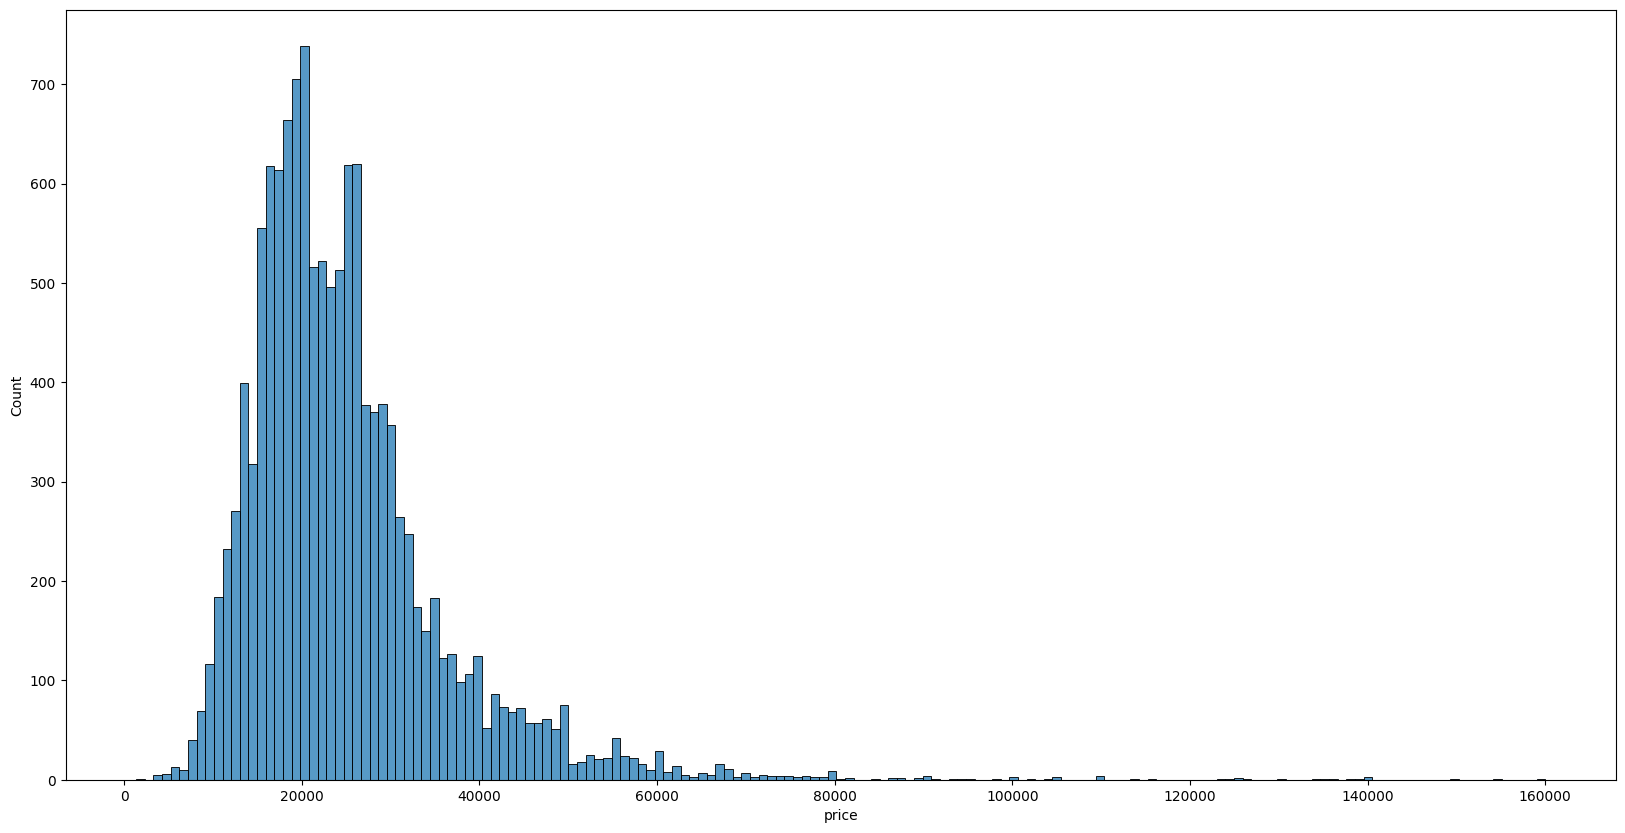

In [38]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='price')
plt.show()

# Bu distribution grafigi hisoblanadi
# Bunda mashinalar narxiga qarab ularning miqdori yani soni ifodalangan
# Etibor bersak 2000 atrofidagi mashinalar juda ko'p xato 700 ta dan xam oshiq ekan
# Mashinalar narxi oshgani sayin ularning soni ham kamayib boryabdi

<Figure size 2000x1000 with 0 Axes>

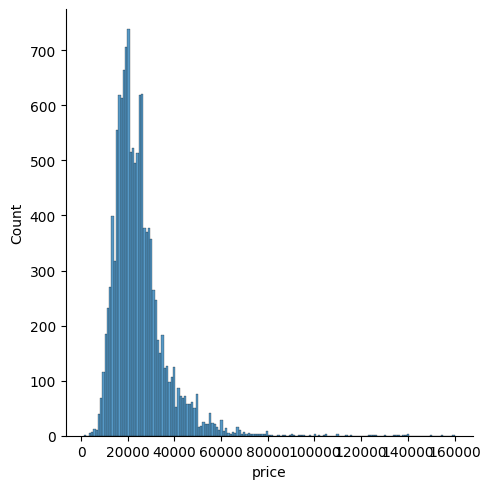

In [82]:
plt.figure(figsize=(20,10))
sns.displot(data=df, x='price')
plt.show()

# Bunda displotdan foydalandik yuqorida histplotdan foydalangan edik.
# Aslida histplot ham displotning tarkibiy qismi hisoblanadi yani displotning ichiga kirib ketadi.
# Bunga etibor bersak uning figsize biz aytganday o'zgarmadi chunki bu metodning
# hajm o'zgartiruvchi buyruqlari boshqacha hisoblanadi.

In [40]:
df.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1


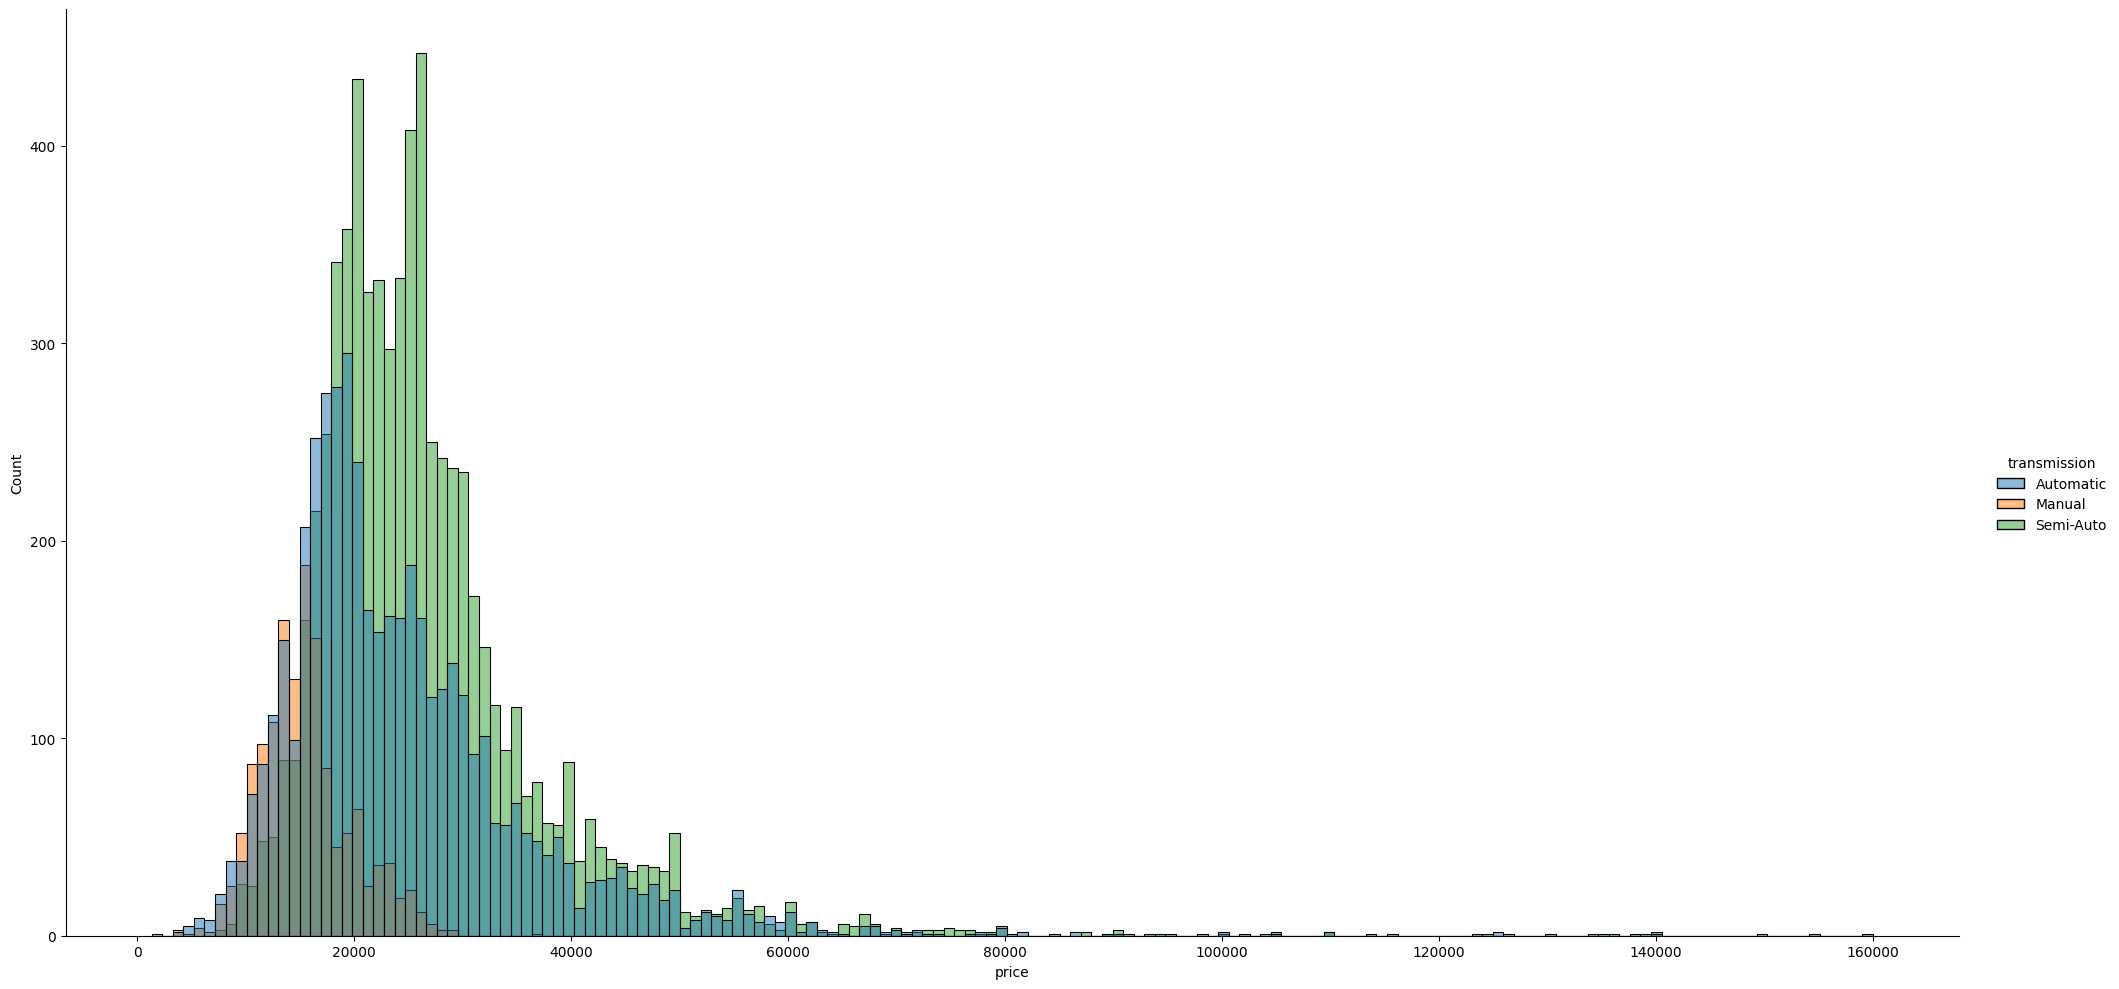

In [41]:
sns.displot(data=df, x='price', height=10, aspect=2, hue='transmission')
plt.show()
# height=10  balandligi
# aspect=2   bu martada beriladi yani aspect dagi 2 bo'yidan 2 marta katta bo'lsin eni degani.
# hue='transmission'  bu bilan mashina karobkalarini ranglarga ajratgan holda ko'ryabmiz

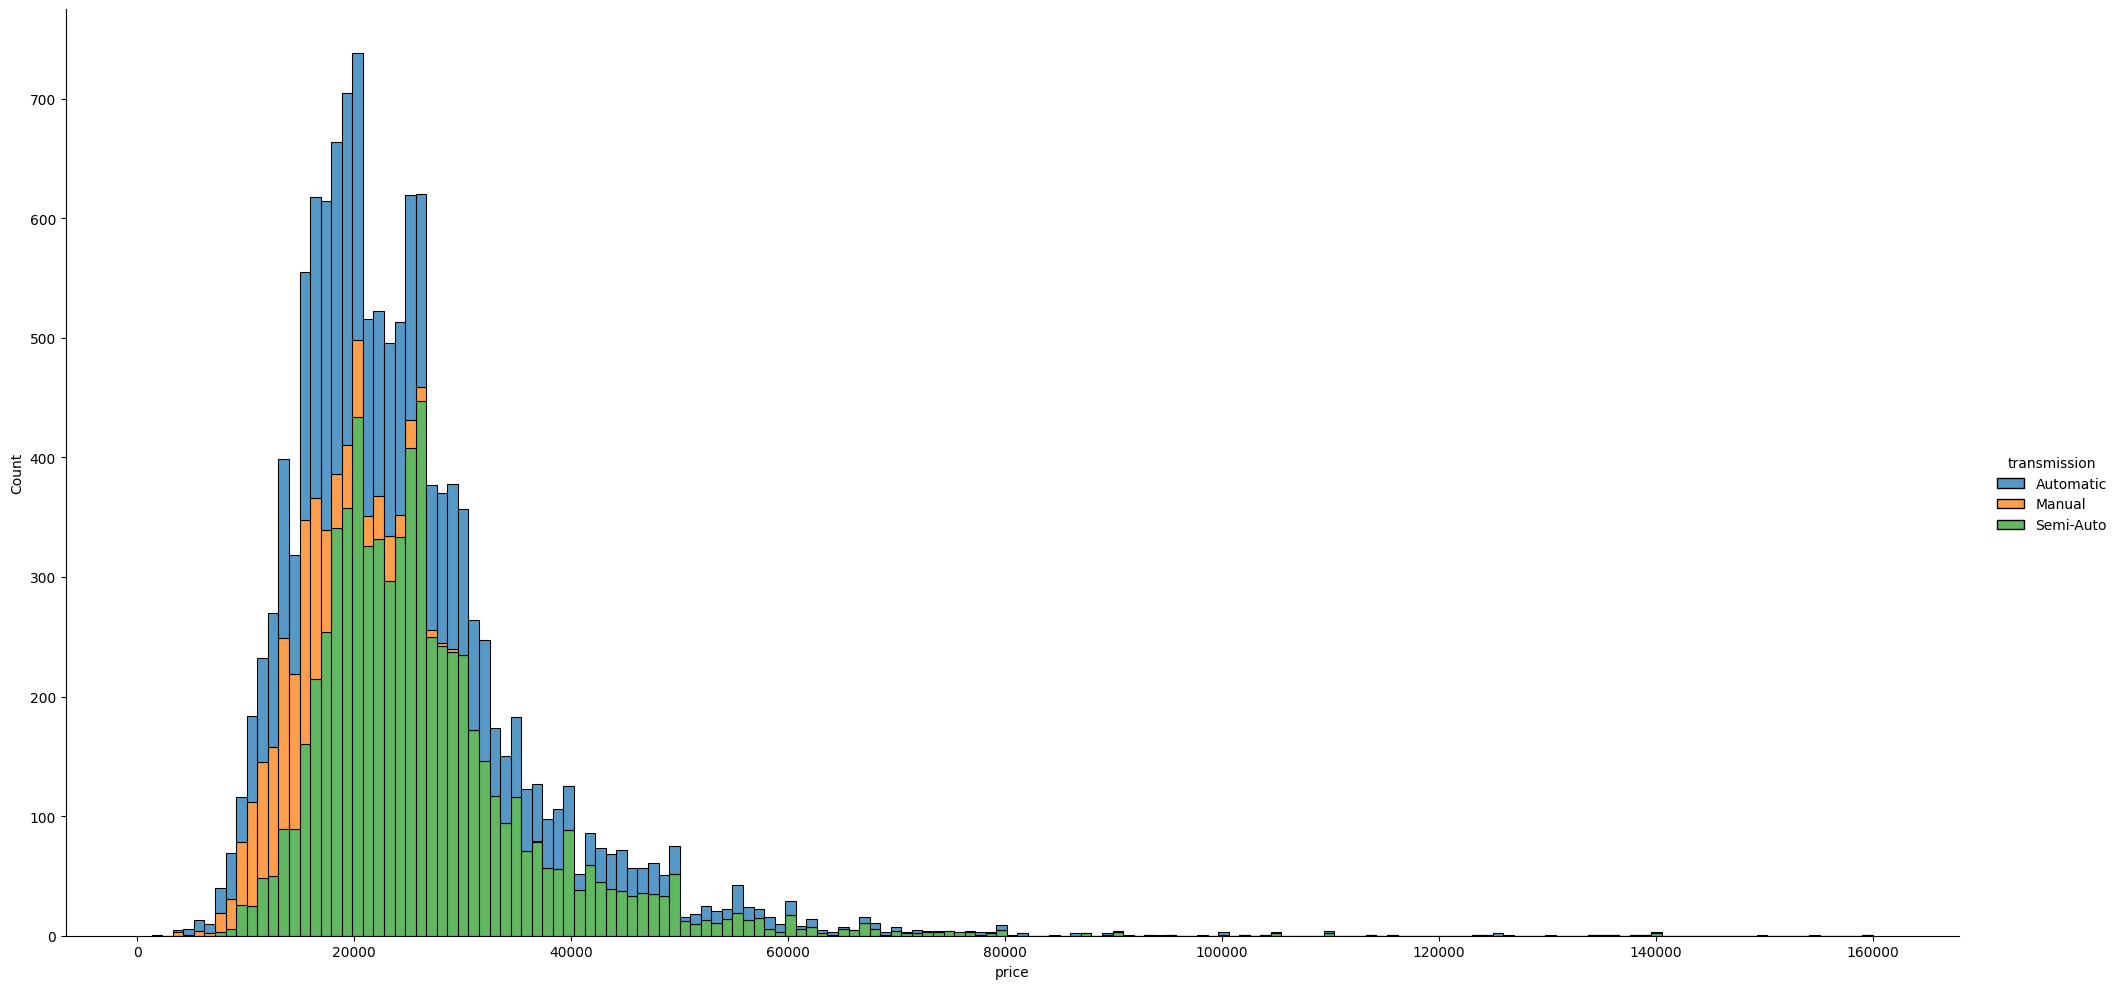

In [42]:
sns.displot(data=df, x='price', height=10, aspect=2, hue='transmission', multiple='stack')
plt.show()
# Yuqoridagining ranglari aralashib ketgan edi
# multiple='stack' bilan ranglarni alohida ko'rinishda chiqarishimiz mumkin

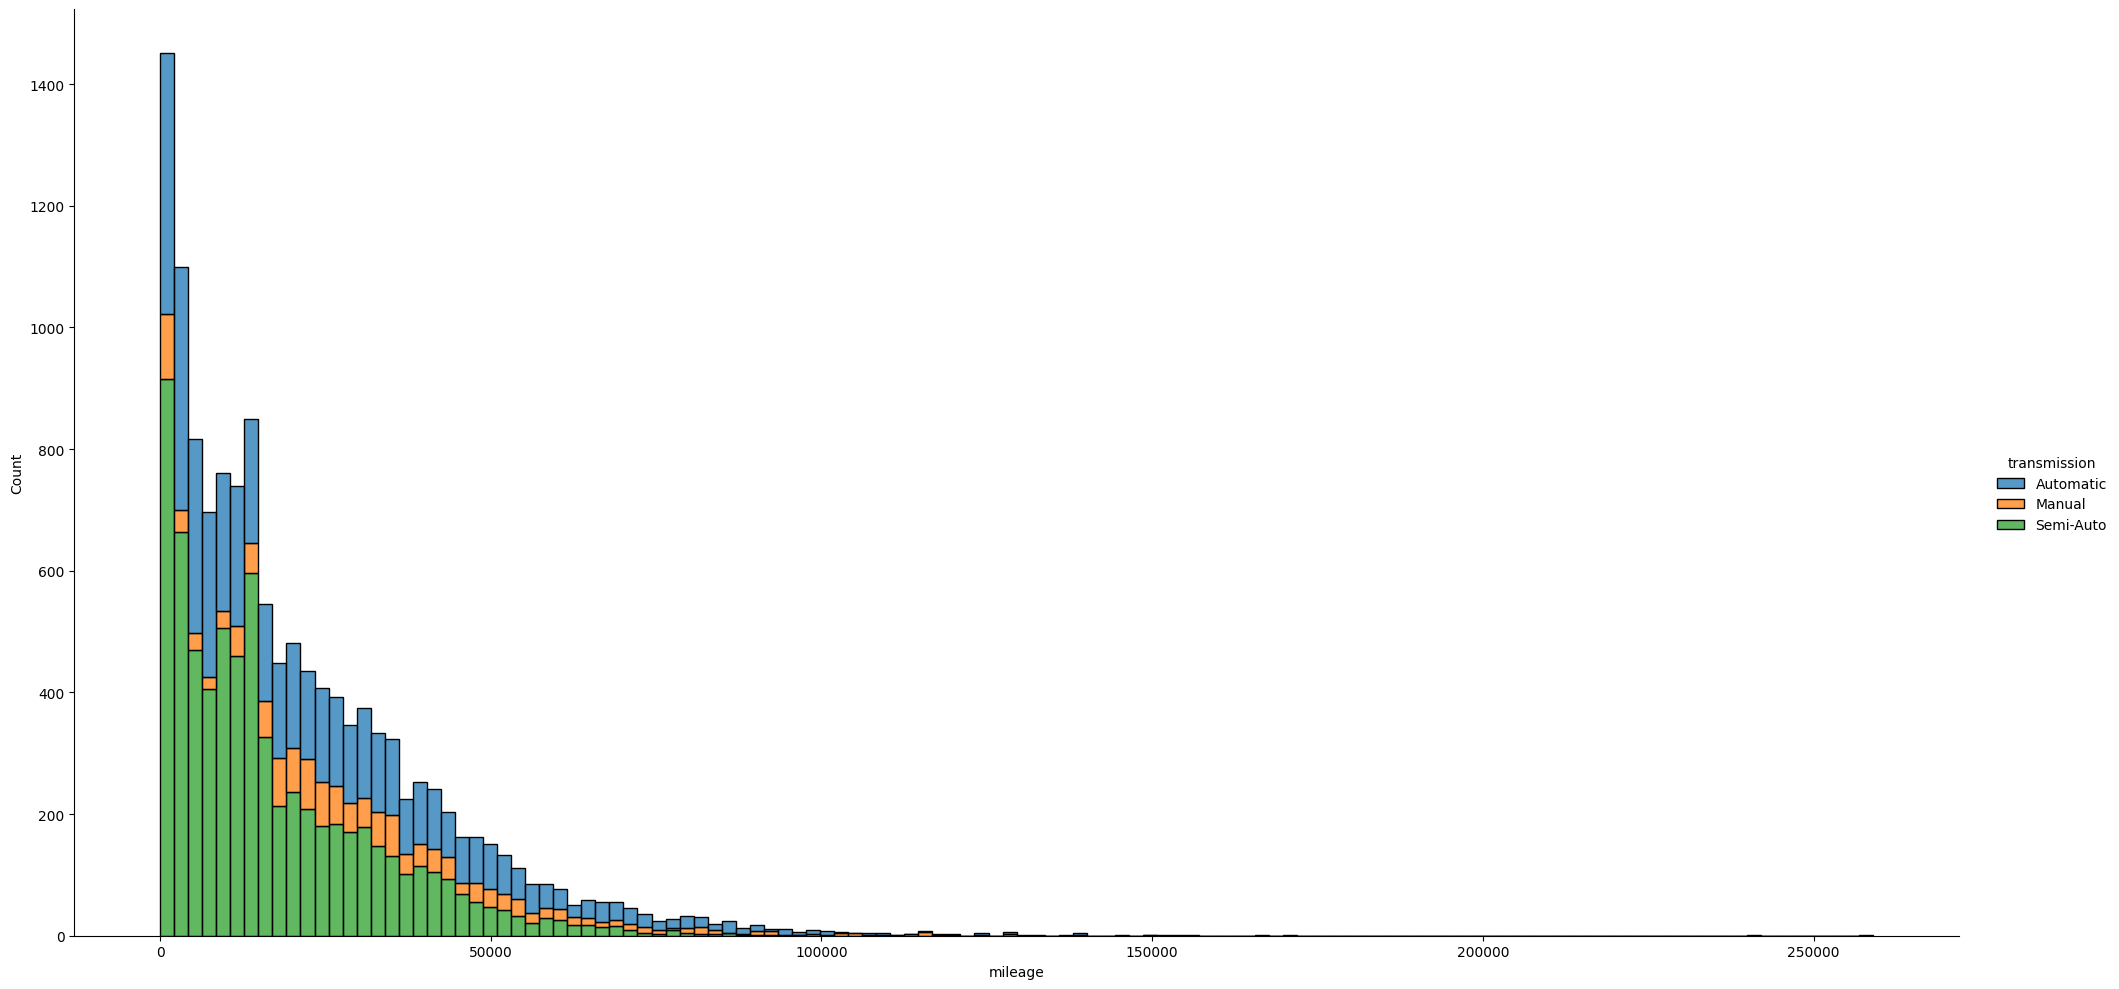

In [43]:
sns.displot(data=df, x='mileage', height=10, aspect=2, hue='transmission', multiple='stack')
plt.show()
# Bunda price emas mileage bo'yicha chiqarildi

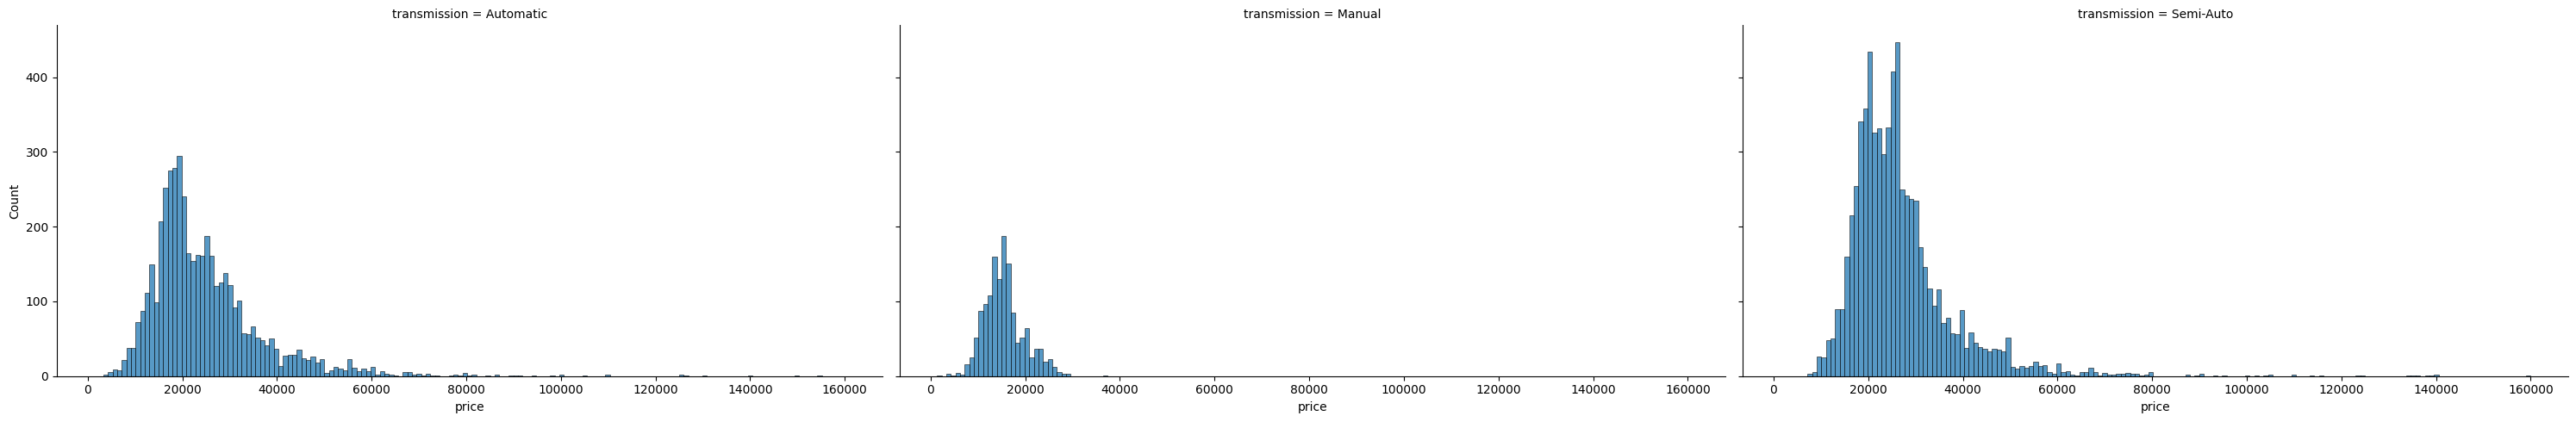

In [44]:
sns.displot(data=df, x='price', height=5, aspect=2, col='transmission')
plt.show()
# col='transmission' dan foydalansak 3 ta yoqilg'ini qo'shmagan holda hue='transmission' dan
# farqli ravishda alohida qilib chiqarib beradi

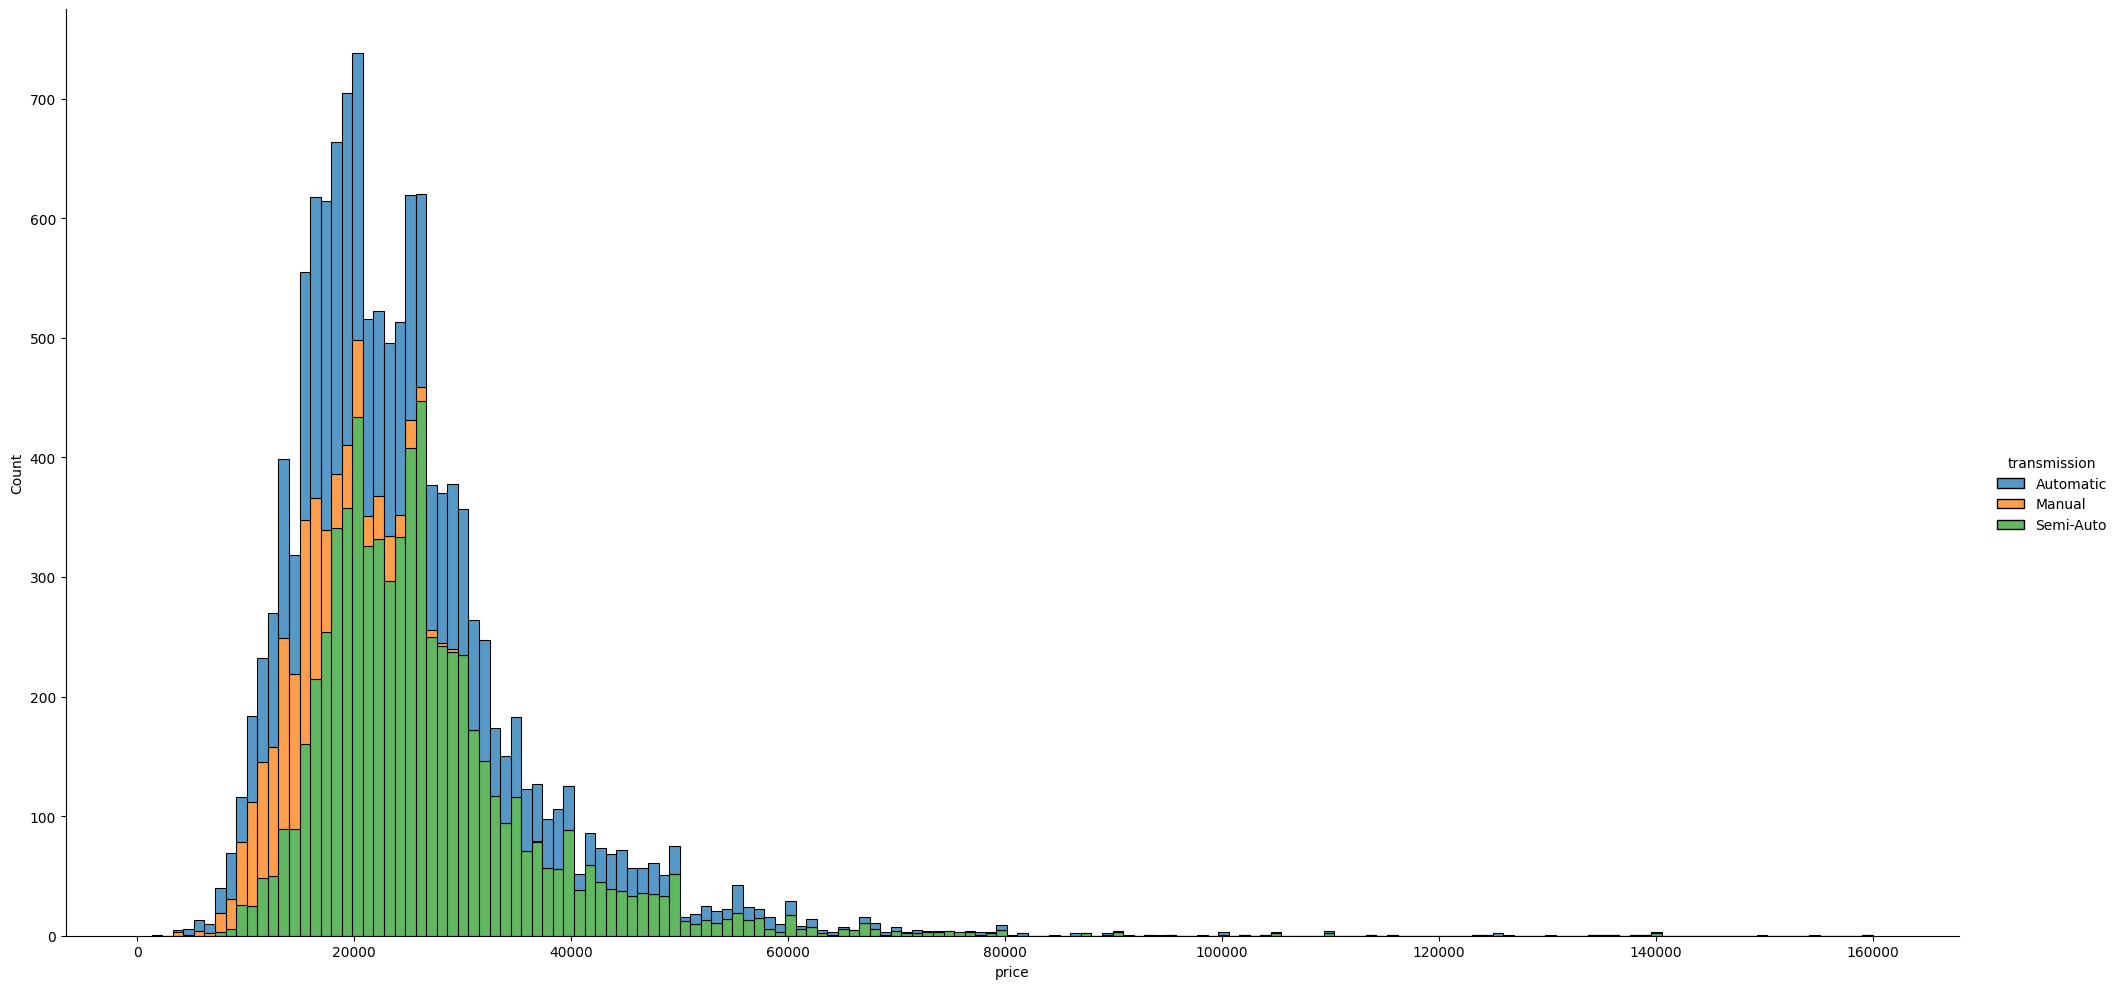

In [47]:
sns.displot(data=df, x='price', height=10, aspect=2, hue='transmission', multiple='stack')
plt.show()

 Bu grafik ham histogramma hisoblanadi. Aniqroq aytilganda, multiple='stack' opsiyasi tufayli bu stacked histogramma (bir-birining ustiga yig'ilgan histogramma) bo'ladi. U har bir transmission turi uchun price taqsimotini alohida, ammo bir-birining ustiga qo'yib ko'rsatadi, bu esa guruhlararo taqsimotni solishtirishga yordam beradi.

# **11-dars.**

# **Taqsimot. KDE**

## histplot (Histogramma):

Nima u? Ma'lumotlarning taqsimotini ustunlar orqali ko'rsatadi. Har bir ustun ma'lum bir diapazondagi qiymatlarning qancha marta uchrashini (chastotasini) bildiradi.

Qachon ishlatiladi? Bir o'zgaruvchining qanday taqsimlanganini, uning eng ko'p qaysi qiymatlarda to'planganini va qanday shaklga ega ekanligini ko'rish uchun.

## kdeplot (Kernel Zichlik Bahosi grafigi):

Nima u? Bu ham ma'lumotlarning taqsimotini ko'rsatadi, lekin histogrammadagi ustunlar o'rniga silliq, uzluksiz chiziq (egri chiziq) shaklida ifodalaydi. U ma'lumotlarning zichligini baholaydi.

Qachon ishlatiladi? Taqsimotning umumiy shaklini, cho'qqilarini va zichligini aniqroq, silliqroq ko'rish uchun, ayniqsa kichik ma'lumotlar to'plamlarida yoki ma'lumotlar juda xilma-xil bo'lganda.

## displot (Distribution Plot - Taqsimot grafigi):

Nima u? seaborn kutubxonasidagi umumiy funksiya bo'lib, bir o'zgaruvchining taqsimotini vizualizatsiya qilish uchun ishlatiladi. U o'z ichiga histplot, kdeplot va boshqa taqsimot grafiklarini olishi mumkin.

Qachon ishlatiladi? Agar siz taqsimotni turli yo'llar bilan (histogramma, KDE yoki ikkalasini birga) ko'rishni istasangiz. displot bir nechta kichik grafiklar (subplots) yaratish yoki hue, col, row kabi parametrlar bilan bir nechta guruh taqsimotini solishtirish uchun juda qulay.

Asosiy farqi:   
 histplot va kdeplot ko'pincha bitta grafikni bitta Axes ob'ektiga chizadi (axes-level functions). displot esa o'zining ichki Figure ob'ektini yaratadi va unga bir yoki bir nechta Axes ob'ektini chizadi (figure-level function). Shuning uchun displotda figsize kabi parametrlarni to'g'ridan-to'g'ri berish mumkin emas, balki height va aspect kabi o'ziga xos parametrlar ishlatiladi.

Qisqacha qilib aytganda:

histplot sizga ma'lumotlaringizning qancha marta paydo bo'lishini (chastotasini) ustunlar orqali ko'rsatadi.

kdeplot ma'lumotlaringizning zichligini silliq chiziq orqali ko'rsatadi.

displot esa bu ikkalasini va boshqa taqsimot grafiklarini umumlashtiruvchi, ko'proq imkoniyatlarga ega bo'lgan kuchli funksiyadir. U yordamida guruhlar bo'yicha taqsimotlarni yonma-yon yoki bir-birining ustiga qo'yib solishtirish mumkin.


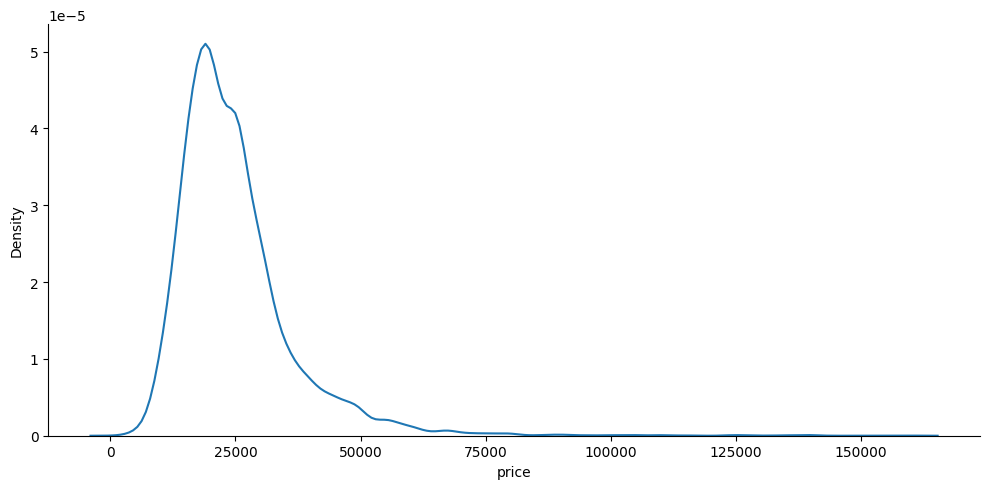

In [64]:
sns.displot(data=df, x='price', height=5, aspect=2, kind='kde')
plt.show()

# kind='kde' bu sns.displot ichida Kernel Zichlik Bahosi (Kernel Density Estimate) degan ma'noni anglatadi.
# Kernel Density Estimate (KDE) ning o'zbekcha ma'nosi Kernel Zichlik Bahosi.
# U ma'lumotlarning taqsimotini silliq, uzluksiz chiziq ko'rinishida ko'rsatib beradi,
# bu histogrammalarga o'xshab ustunlar o'rniga, ma'lumotlarning qayerda ko'proq to'planganini vizualizatsiya
# qilishga yordam beradi. Oddiy qilib aytganda, u ma'lumotlarning zichligini silliq egri chiziq orqali ifodalaydi.

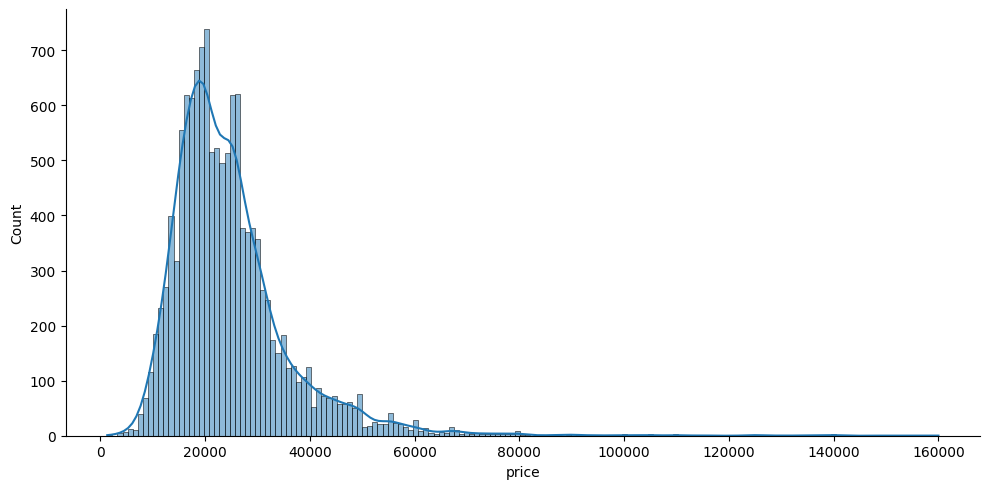

In [65]:
sns.displot(data=df, x='price', height=5, aspect=2, kde=True)
plt.show()
# kde=True bu bilan ham histogramma ham kde yani chiziqli ko'rinishi chiqib kelyabdi

/tmp/ipython-input-1570407862.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='price', shade=True)


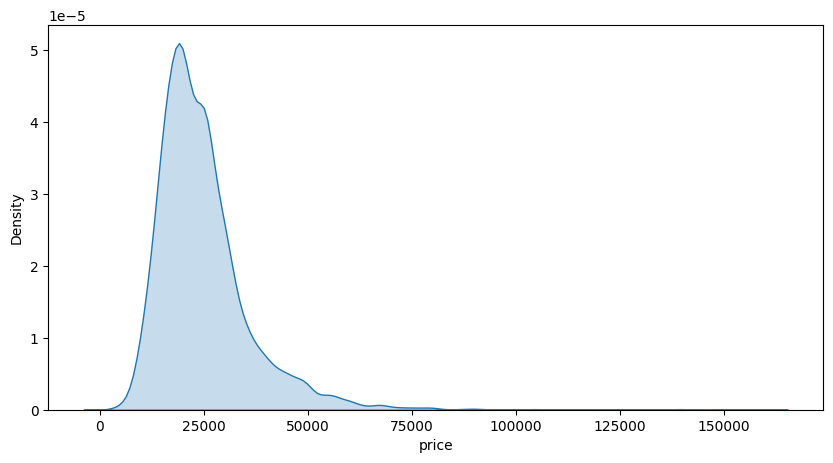

In [50]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='price', shade=True)
plt.show()

# shade=True shade bu soya degani yani chiziq ichini rang bilan to'ldiradi

In [52]:
df.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1


/tmp/ipython-input-3906826141.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='price', hue='fuelType', shade=True)


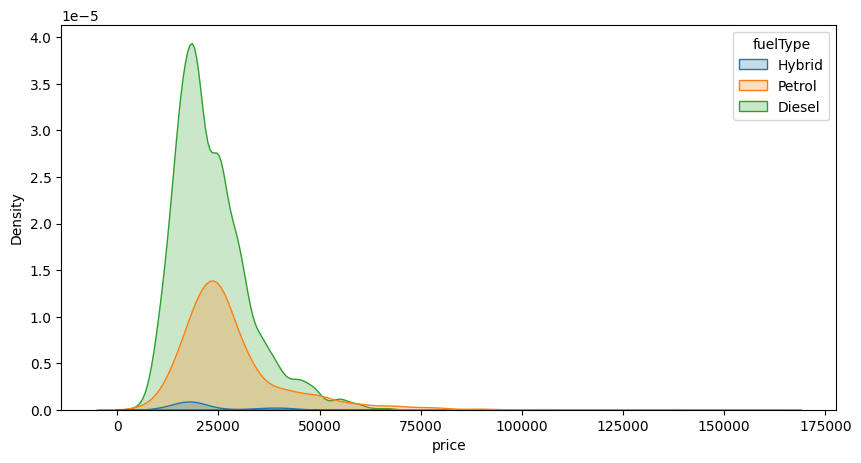

In [51]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='price', hue='fuelType', shade=True)
plt.show()

#  hue='fuelType' yoqilg'i turlarini qo'shdik

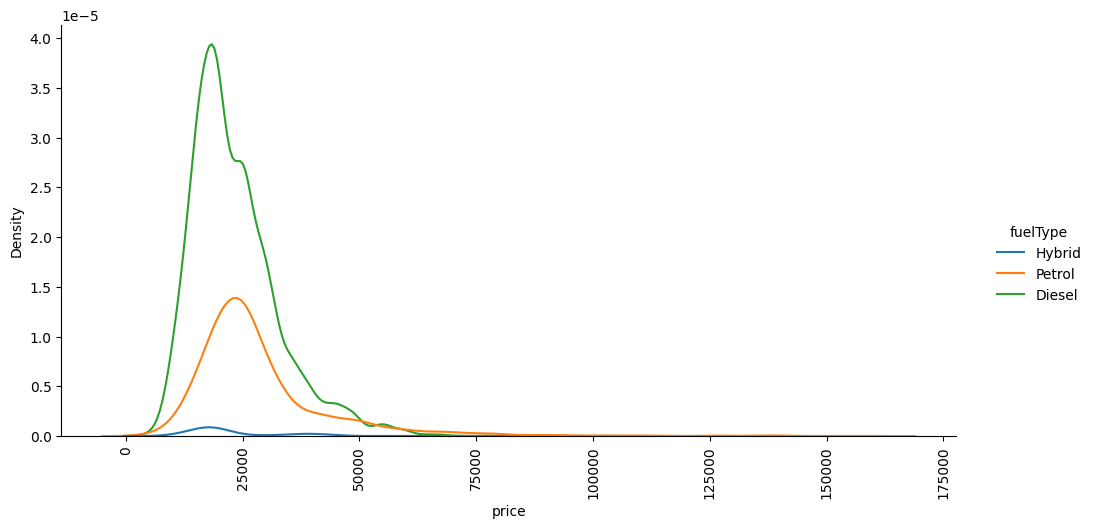

In [58]:
sns.displot(data=df, x='price', hue='fuelType', kind='kde', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()
# huddi yuqoridagi amalni displotda qildik.
# kind='kde  yani turini kdeplot ga o'zgartirgan holda

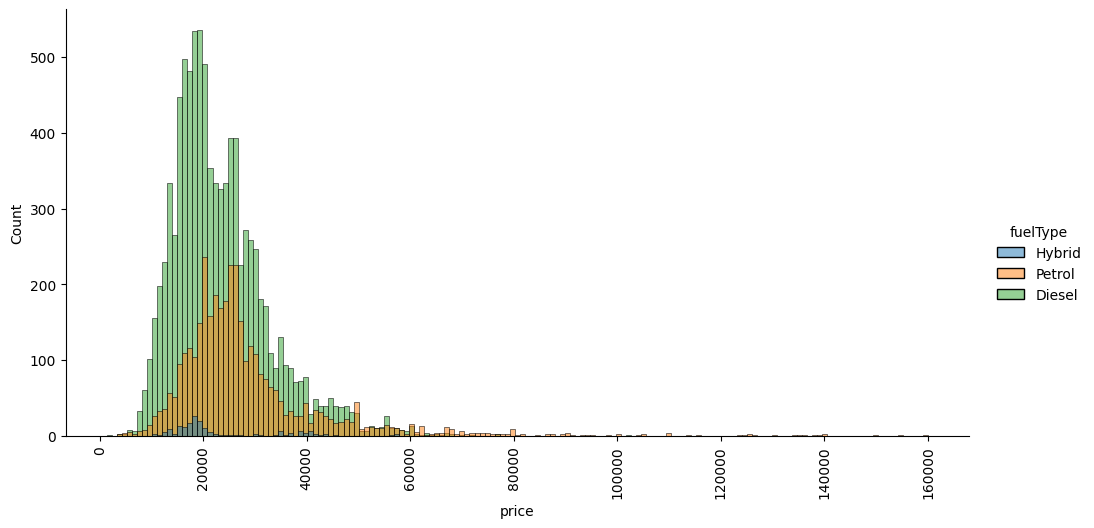

In [83]:
sns.displot(data=df, x='price', hue='fuelType', kind='hist', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()
# bunda ham displotdan foydalanib kind yani turini hist yani histplotga o'zgartirdik

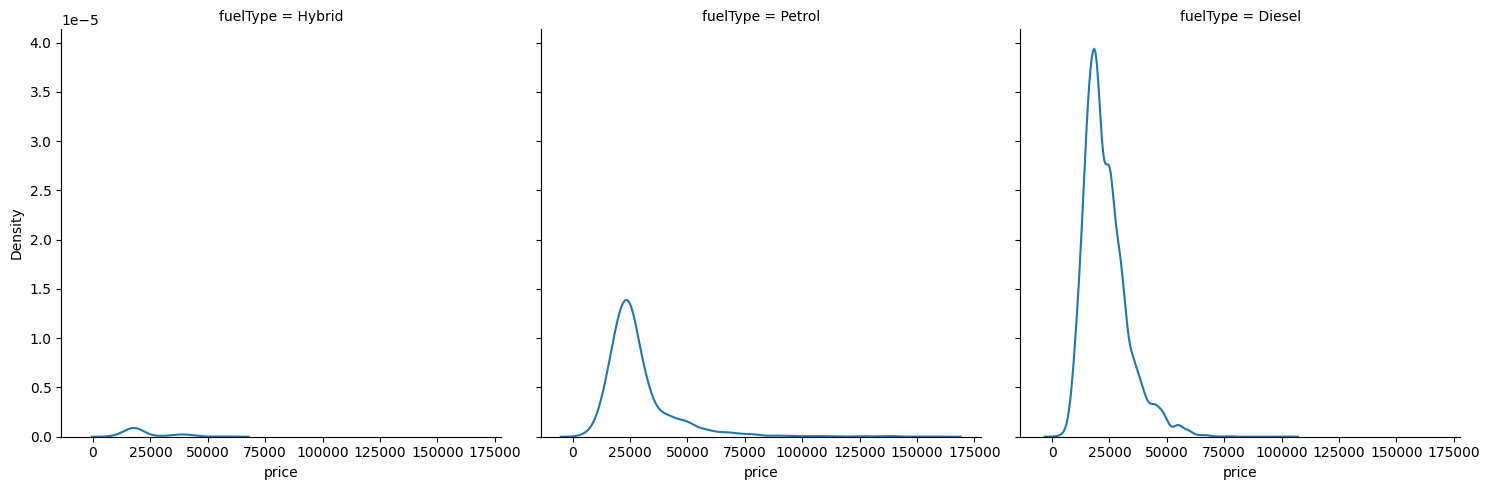

In [74]:
sns.displot(data=df, x="price", col="fuelType", kind='kde', height=5, aspect=1)
plt.show()

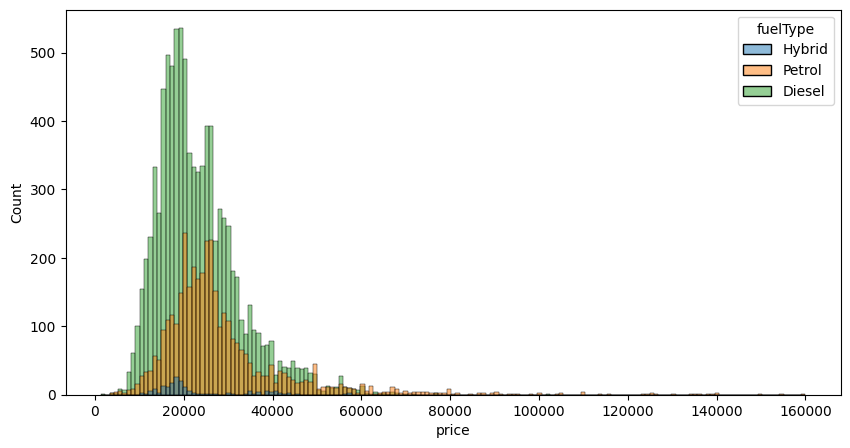

In [63]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='price', hue='fuelType')
plt.show()
# Bu histplot da qilindi

Qisqacha qilib aytganda:

 histplot - bu shaklli taqsimot diagrammalar qiladi.

kdeplot - bu histplot diagrammalarining faqat tashqi chiziqlarini chizadi

displot - esa histplot va kdeplot ni ham umumlashtirgan holda ikkalasining ham vazifasini bajaradi chunki ikkalasi ham displot ning tarkibiga kiradi.

# NEW SECTION

## Ikki o'lchamli (2D) KDE

In [75]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2


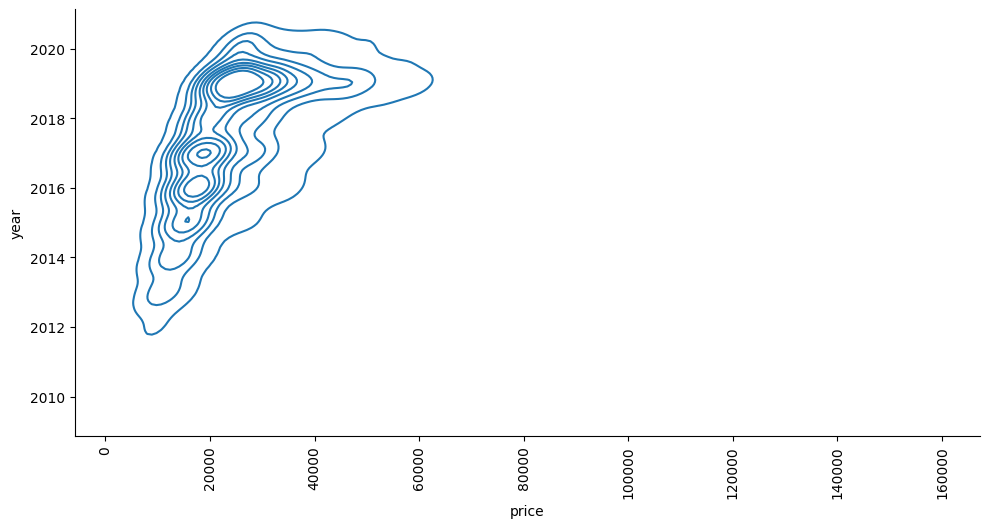

In [76]:
sns.displot(data=df, x="price", y="year", kind="kde", height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

Bu grafikning bunday shaklda bo'lishining sababi shundaki, u price (narx) va year (yil) ustunlarining birgalikdagi taqsimotini va zichligini ko'rsatadi:

Zichlikni ifodalash: 2D KDE grafigi ranglar orqali ma'lumotlar nuqtalarining zichligini ko'rsatadi. Grafika qanchalik quyuq yoki rang intensivligi yuqori bo'lsa, o'sha hududda price va year qiymatlarining kombinatsiyasi ko'proq uchrashini anglatadi.

Misol: Agar siz grafikda eng quyuq rangli hududga qarasangiz, u taxminan 2015-2018 yillar oralig'idagi va 20,000-40,000 atrofidagi narxdagi avtomobillar eng ko'p ekanligini bildiradi. Bu esa ushbu kombinatsiyadagi mashinalar bozorda eng keng tarqalganligini ko'rsatadi.

Bu grafikni "ikki o'lchamli" deb atashimizning sababi shundaki, u bir vaqtning o'zida ikkita o'zgaruvchi (price va year) orasidagi munosabatni va ularning birgalikdagi taqsimotini ko'rsatadi.

Bir o'lchamli grafiklar (masalan, faqat x='price' bo'lgan histplot yoki kdeplot) bitta o'zgaruvchining taqsimotini ko'rsatadi.

## Demak, price va year kabi ikkita ustunni birgalikda tahlil qilganimiz uchun bu grafikni ikki o'lchamli deb ataymiz.

# **12-dars**

# **Taqsimot. CDE**

In [66]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2


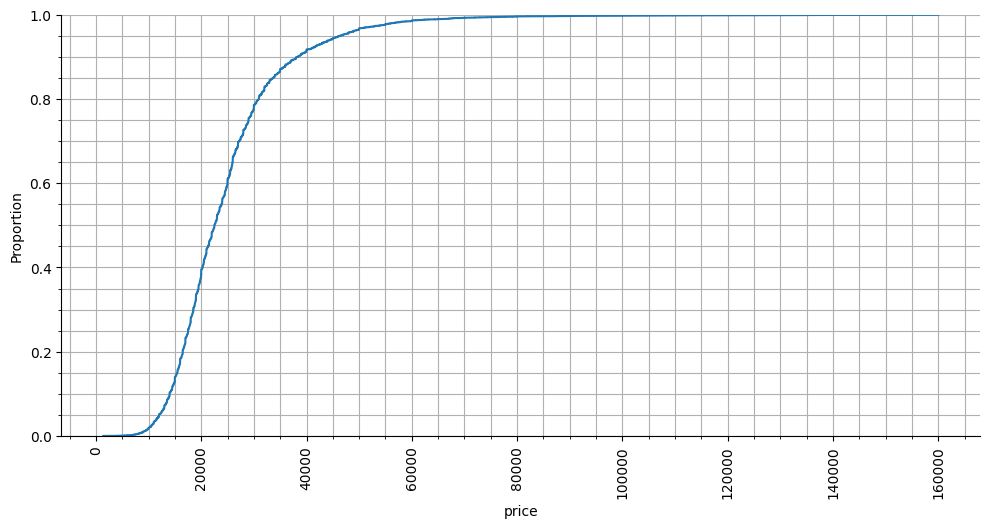

In [72]:
sns.displot(data=df, x="price", kind="ecdf", height=5, aspect=2)
plt.xticks(rotation=90) # x o'qidagi yillarni 90 gradusda joylashtiradi
plt.grid(which='both') # both ning o'rniga (major) kattaroq setka va (minor) turlari ham bor
plt.minorticks_on()
plt.show()

# kind="ecdf" bu sns.displot ichida Empirical Cumulative Distribution Function
# (Empirik Kumulyativ Taqsimot Funksiyasi) degan ma'noni anglatadi.

# Nima u? ECDF grafigi ma'lumotlarning kumulyativ taqsimotini ko'rsatadi.
# Ya'ni, ma'lum bir qiymatdan kichik yoki unga teng bo'lgan ma'lumotlarning umumiy foizini
# (yoki ulushini) ko'rsatadi. U har doim 0 dan boshlanib, 1 (yoki 100%) ga ko'tariladi.

# Qisqacha qilib aytganda, kind="ecdf" sizga ma'lumotlaringizning qancha qismi ma'lum bir qiymatdan
# past ekanligini ko'rsatuvchi kumulyativ chiziqli grafikni chizib beradi.

# plt.minorticks_on() grafigingizga qo'shimcha kichik o'q belgilarini qo'shib,
# ma'lumotlarni o'qishni osonlashtiradi va vizual aniqlikni oshiradi.

Bu grafikdan shuni xulosa qilamiz:

 chap tomonidagi 0.0 dan 1 gacha bo'lgan sonlarni 1 ni 100% deb olsak
 shunda mashinalarning 40% i 20000 dollardan pastda ekan.

 Yoki mashinlarning 90% i 40000 dollargacha ekan deb hulosa qilishimiz mumkin.

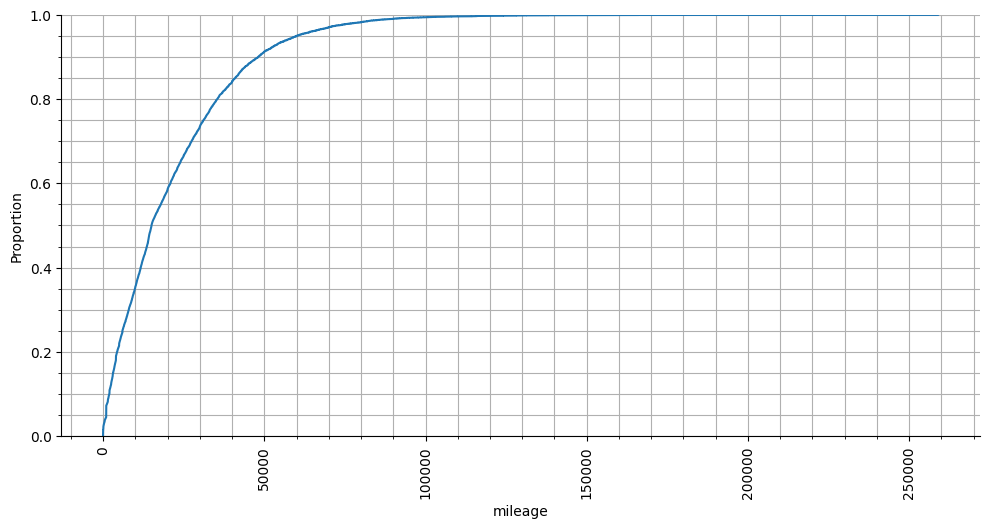

In [73]:
sns.displot(data=df, x="mileage", kind="ecdf", height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()
# Bunda mileage ustunini oldik

# Hamda hulosa qilsak 90% mashinalar 50000 km dan kam yurgan ekan

# **NEW SECTION**

In [78]:
df.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1


In [79]:
df['fuelType'].unique()

array(['Hybrid', 'Petrol', 'Diesel'], dtype=object)

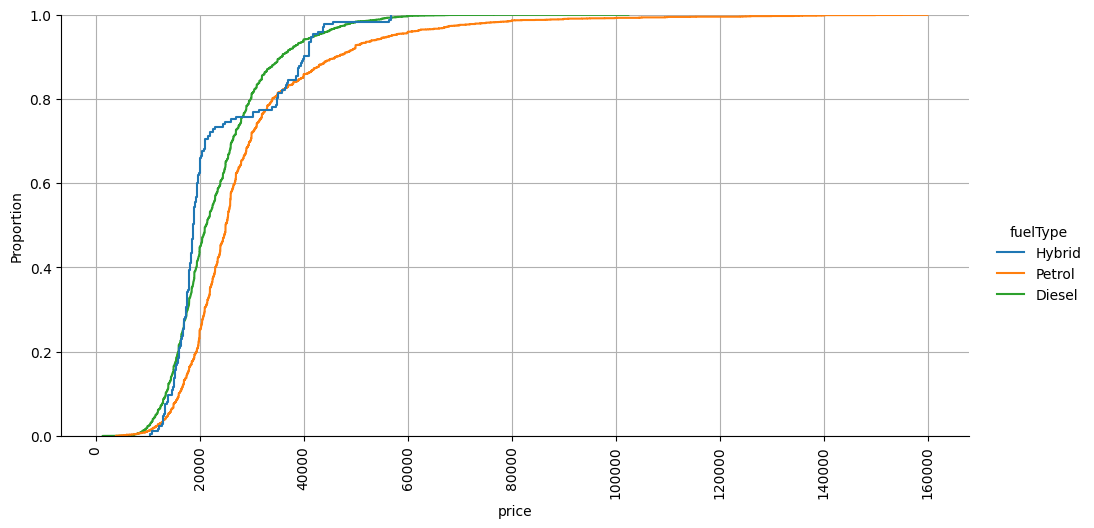

In [77]:
sns.displot(data=df, x="price", hue="fuelType", kind="ecdf", height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid()
plt.show()

sns.displot funksiyasida hue='fuelType'

 u fuelType ustunidagi har bir noyob qiymat uchun alohida grafik chizadi.  uchta xil fuelType (masalan, Petrol, Hybrid, Diesel) mavjudligi sababli, grafikda ham uchta alohida ECDF chizig'i paydo bo'ladi.

In [81]:
df['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

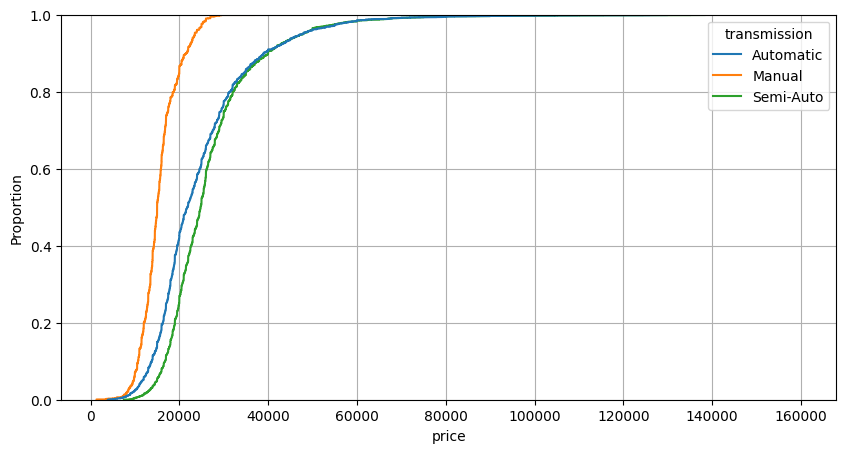

In [80]:
plt.figure(figsize=(10,5))
sns.ecdfplot(data=df, x="price", hue="transmission")
plt.grid()
plt.show()